In [159]:
import matplotlib.pyplot as plt

from report import open_experiment_report, FiveFoldResults

In [160]:

res_replay_mlp2c_v2 = open_experiment_report("../results/exp2-mlp-2c-v2")
res_initial_mlp2c = open_experiment_report("../results/exp2-mlp-2c-initial")

res_replay_mlp6c_v2 = open_experiment_report("../results/exp2-mlp-6c-v2")
res_initial_mlp6c = open_experiment_report("../results/exp2-mlp-6c-initial")

res_replay_xgb2c_v2 = open_experiment_report("../results/exp2-xgb-2c-v2")
res_initial_xgb2c = open_experiment_report("../results/exp2-xgb-2c-initial")

res_replay_xgb6c_v2 = open_experiment_report("../results/exp2-xgb-6c-v2")
res_initial_xgb6c = open_experiment_report("../results/exp2-xgb-6c-initial2")

res_ewc_inc = open_experiment_report("../results/exp2-ewc-v2")

Found 4 runs in folder exp2-mlp-2c-v2
Found 1 runs in folder exp2-mlp-2c-initial
Found 4 runs in folder exp2-mlp-6c-v2
Found 1 runs in folder exp2-mlp-6c-initial
Found 4 runs in folder exp2-xgb-2c-v2
Found 1 runs in folder exp2-xgb-2c-initial
Found 4 runs in folder exp2-xgb-6c-v2
Found 1 runs in folder exp2-xgb-6c-initial2
Found 5 runs in folder exp2-ewc-v2


# Quick overview replayd
- SE1: replay XGB 2c + 6c - Varying RP%
- SE2: replay 2c + 6c - Varying RP%
- SE3: EWC 20inc 

In [161]:
axis_font_size = 14
title_font_size = 16
fig_title_font_size = 18
legend_font_size = 14

# SE1

Final accuracy: 0.829 0.009 (clients=2, replay=0.0)
Final accuracy: 0.836 0.007 (clients=2, replay=0.1)
Final accuracy: 0.842 0.006 (clients=2, replay=0.3)
Final accuracy: 0.841 0.011 (clients=2, replay=1.0)
Final accuracy: 0.830 0.008 (clients=6, replay=0.0)
Final accuracy: 0.836 0.007 (clients=6, replay=0.1)
Final accuracy: 0.843 0.01 (clients=6, replay=0.3)
Final accuracy: 0.830 0.013 (clients=6, replay=1.0)


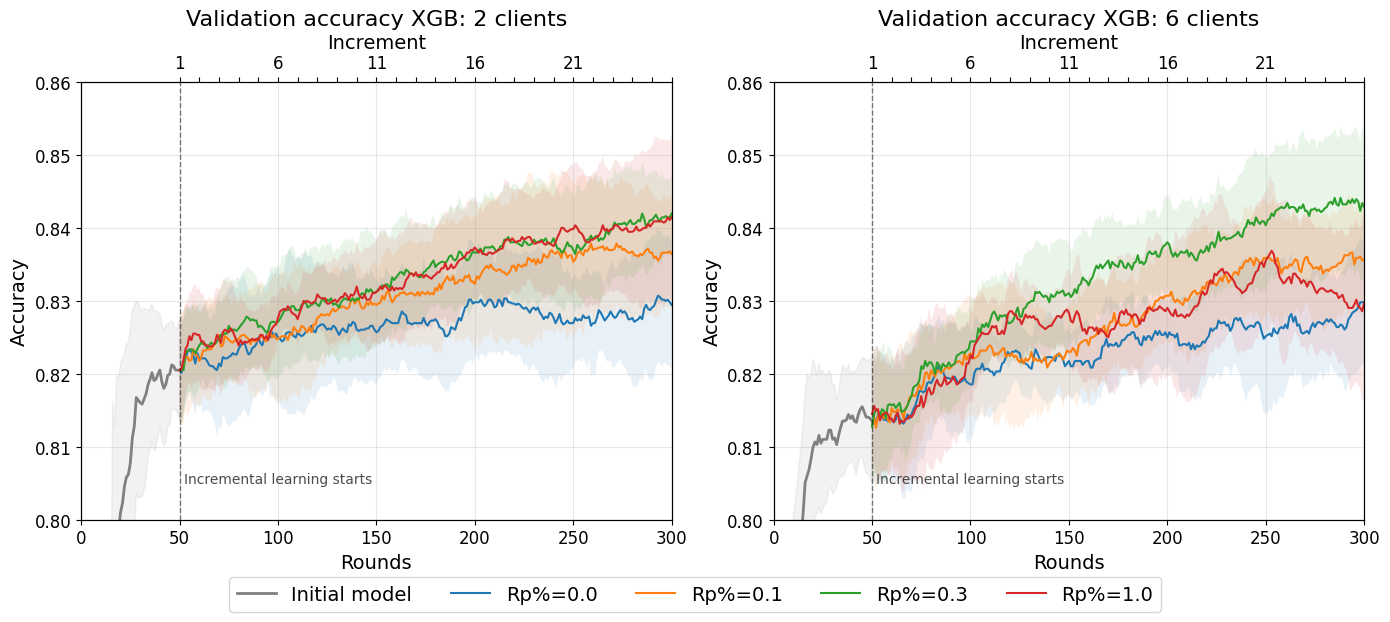

In [170]:
# SE1 - XGB Replay with Initial Models
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6), sharex=True)
axes = [ax1, ax2]

# Lists to store line objects for the combined legend
line_objects = []
line_labels = []

def plot_xgb_replay(ax, res_replay_xgb, res_initial_xgb, clients):
    # First plot the initial model (first 50 rounds)
    for i, res in enumerate(res_initial_xgb):
        # Only plot the first initial model
        if i > 0:
            continue
            
        hyperparams = res.hyperparameters()
        il_config = res.il_config()
        
        rounds, mean, std = res.get_mean_std("accuracy")
        
        # Limit to first 50 rounds
        limit = 50
        if len(rounds) > limit:
            rounds = rounds[:limit]
            mean = mean[:limit]
            std = std[:limit]
        
        # Plot initial model
        ax.fill_between(rounds, mean - std, mean + std, alpha=0.1, color='gray')
        line, = ax.plot(rounds, mean, color='gray', linestyle='-', linewidth=2)
        
        # Add to legend only for first subplot
        if clients == 2:
            line_objects.append(line)
            line_labels.append("Initial model")
    
    # Then plot the replay models
    for i, res in enumerate(res_replay_xgb):
        hyperparams = res.hyperparameters()
        il_config = res.il_config()
        replay = il_config['replay']
        
        rounds, mean, std = res.get_mean_std("accuracy")
        
        # Adjust rounds to start after initial model (offset by 50)
        adjusted_rounds = [r + 50 for r in rounds]

        # Store line object and label only from the first subplot
        line, = ax.plot(adjusted_rounds, mean, label=f"Rp%={replay}")
        if clients == 2:  # Only collect from first subplot
            line_objects.append(line)
            line_labels.append(f"Rp%={replay}")
            
        ax.fill_between(adjusted_rounds, mean - std, mean + std, alpha=0.1)
        
        acc_final, std = res.get_final("accuracy")
        print(f"Final accuracy: {acc_final:.3f} {std} (clients={clients}, replay={replay})")
    
    ax.grid(alpha=0.3)
    ax.set_ylabel("Accuracy", fontsize=axis_font_size)
    ax.set_xlabel("Rounds", fontsize=axis_font_size) 
    ax.set_ylim(0.8, 0.86)
    ax.set_xlim(0, 300)
    ax.tick_params(axis='both', labelsize=axis_font_size-2)
    
    # Add second x-axis for increments
    ax2 = ax.twiny()
    
    # Position increments to start after initial training (50 rounds)
    increment_position = [50 + i * 10 for i in range(26)]
    increment_labels = [f"{i+1}" if i % 5 == 0 else "" for i in range(26)]
    increment_labels[-1] = ""

    ax2.set_xticks(increment_position)
    ax2.set_xticklabels(increment_labels)
    ax2.set_xlabel("Increment", fontsize=axis_font_size)
    ax2.tick_params(axis='x', labelsize=axis_font_size-2)
    ax2.set_xlim(0, 300)
    
    
    ax.set_title(f"Validation accuracy XGB: {clients} clients", fontsize=title_font_size)


# Plot both client configurations
plot_xgb_replay(ax1, res_replay_xgb2c_v2, res_initial_xgb2c, 2)
plot_xgb_replay(ax2, res_replay_xgb6c_v2, res_initial_xgb6c, 6)

# Add vertical line to mark transition from initial to incremental
for ax in axes:
    ax.axvline(x=50, color='black', linestyle='--', alpha=0.5, linewidth=1)
    ax.text(52, 0.805, "Incremental learning starts", fontsize=10, alpha=0.7)

fig.legend(line_objects, line_labels, 
           loc='lower center', 
           bbox_to_anchor=(0.5, -0.05), 
           ncol=len(line_objects),
           fontsize=legend_font_size)

# Adjust layout to make room for the legend and title
plt.tight_layout()
plt.subplots_adjust(bottom=0.12, top=0.85)  # Make space for legend, title and right-aligned titles

fig.savefig("graphs/exp2_replay_xgb.svg", dpi=300, bbox_inches='tight')

# SE2 - MLP Replay

Final accuracy: 0.831 (0.013) (clients=2, replay=0.0)
Final accuracy: 0.836 (0.011) (clients=2, replay=0.1)
Final accuracy: 0.833 (0.012) (clients=2, replay=0.3)
Final accuracy: 0.828 (0.012) (clients=2, replay=1.0)
Final accuracy: 0.833 (0.011) (clients=6, replay=0.0)
Final accuracy: 0.837 (0.012) (clients=6, replay=0.1)
Final accuracy: 0.834 (0.009) (clients=6, replay=0.3)
Final accuracy: 0.823 (0.011) (clients=6, replay=1.0)


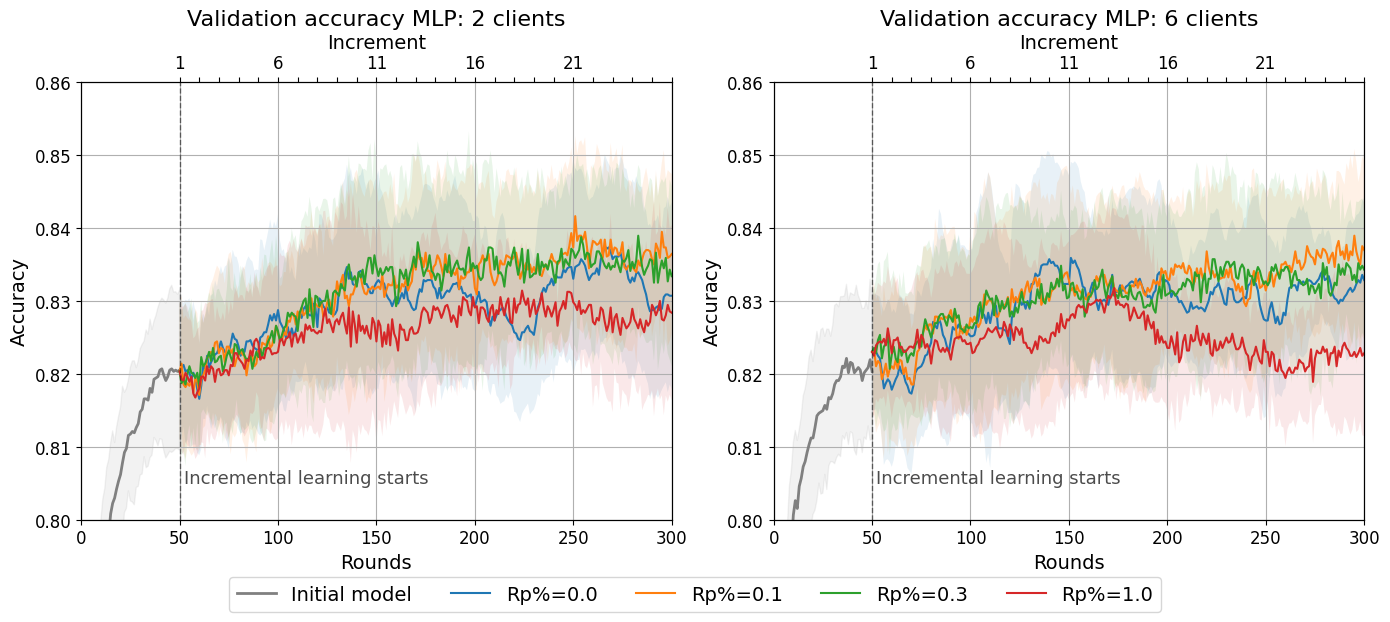

In [171]:
# SE2 - MLP Replay with Initial Models
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))
axes = [ax1, ax2]

# Lists to store line objects for the combined legend
line_objects = []
line_labels = []

def plot_mlp_replay(ax, res_replay_mlp, res_initial_mlp, clients):
    # First plot the initial model (first 50 rounds)
    for i, res in enumerate(res_initial_mlp):
        # Only plot the first initial model
        if i > 0:
            continue
            
        hyperparams = res.hyperparameters()
        il_config = res.il_config()
        
        rounds, mean, std = res.get_mean_std("accuracy")
        
        # Limit to first 50 rounds
        limit = 51
        if len(rounds) > limit:
            rounds = rounds[:limit]
            mean = mean[:limit]
            std = std[:limit]
        
        # Plot initial model
        ax.fill_between(rounds, mean - std, mean + std, alpha=0.1, color='gray')
        line, = ax.plot(rounds, mean, color='gray', linestyle='-', linewidth=2)
        
        # Add to legend only for first subplot
        if clients == 2:
            line_objects.append(line)
            line_labels.append("Initial model")
    
    # Then plot the replay models
    for i, res in enumerate(res_replay_mlp):
        hyperparams = res.hyperparameters()
        lr = hyperparams['lr']
        
        il_config = res.il_config()
        replay = il_config['replay']
        
        rounds, mean, std = res.get_mean_std("accuracy")
        
        # Adjust rounds to start after initial model (offset by 50)
        adjusted_rounds = [r + 50 for r in rounds]

        ax.fill_between(adjusted_rounds, mean - std, mean + std, alpha=0.1)
        line, = ax.plot(adjusted_rounds, mean, label=f"Rp%={replay}")
        
        # Add to legend for first subplot only
        if clients == 2:
            line_objects.append(line)
            line_labels.append(f"Rp%={replay}")
        
        acc_final, std = res.get_final("accuracy")
        print(f"Final accuracy: {acc_final:.3f} ({std}) (clients={clients}, replay={replay})")
    
    ax.set_title(f"Validation accuracy MLP: {clients} clients", fontsize=title_font_size)
    
    ax.set_xlabel("Rounds", fontsize=axis_font_size)
    
    # Add second x-axis for increments
    ax2 = ax.twiny()
    
    # Position increments to start after initial training (50 rounds)
    increment_position = [50 + i * 10 for i in range(26)]
    increment_labels = [f"{i+1}" if i % 5 == 0 else "" for i in range(26)]
    increment_labels[-1] = ""

    ax2.set_xticks(increment_position)
    ax2.set_xticklabels(increment_labels)
    ax2.set_xlabel("Increment", fontsize=axis_font_size)
    ax2.tick_params(axis='x', which='major', labelsize=axis_font_size-2)
    
    # Set proper x limits to include both initial and incremental
    ax.set_xlim(0, 300)
    ax2.set_xlim(0, 300)
    
    # Add y-axis properties
    ax.set_ylim(0.8, 0.86)
    ax.set_ylabel("Accuracy", fontsize=axis_font_size)
    ax.tick_params(axis='both', labelsize=axis_font_size-2)
    ax.grid()
    



# Plot both client configurations with shared x-axis
plot_mlp_replay(ax1, res_replay_mlp2c_v2, res_initial_mlp6c, clients=2)
plot_mlp_replay(ax2, res_replay_mlp6c_v2, res_initial_mlp2c, clients=6)



# Add vertical line to mark transition from initial to incremental
for ax in axes:
    ax.axvline(x=50, color='black', linestyle='--', alpha=0.5, linewidth=1)
    ax.text(52, 0.805, "Incremental learning starts", fontsize=13, alpha=0.7)


# Add a combined legend
fig.legend(line_objects, line_labels, 
           loc='lower center', 
           bbox_to_anchor=(0.5, -0.05), 
           ncol=len(line_objects),
           fontsize=legend_font_size)

# Adjust layout
plt.tight_layout()
plt.subplots_adjust(bottom=0.12, top=0.85)  # Make space for legend, title and right-aligned titles

fig.savefig("graphs/exp2_replay_mlp.svg", dpi=300, bbox_inches='tight')

# Convergence of models

# SE3 - MLP EWC

Final accuracy: 0.830 (0.012) (clients=0)
Final accuracy: 0.830 (0.011) (clients=1000.0)
Final accuracy: 0.830 (0.012) (clients=10000.0)
Final accuracy: 0.834 (0.012) (clients=100000.0)
Final accuracy: 0.462 (0.083) (clients=1000000.0)


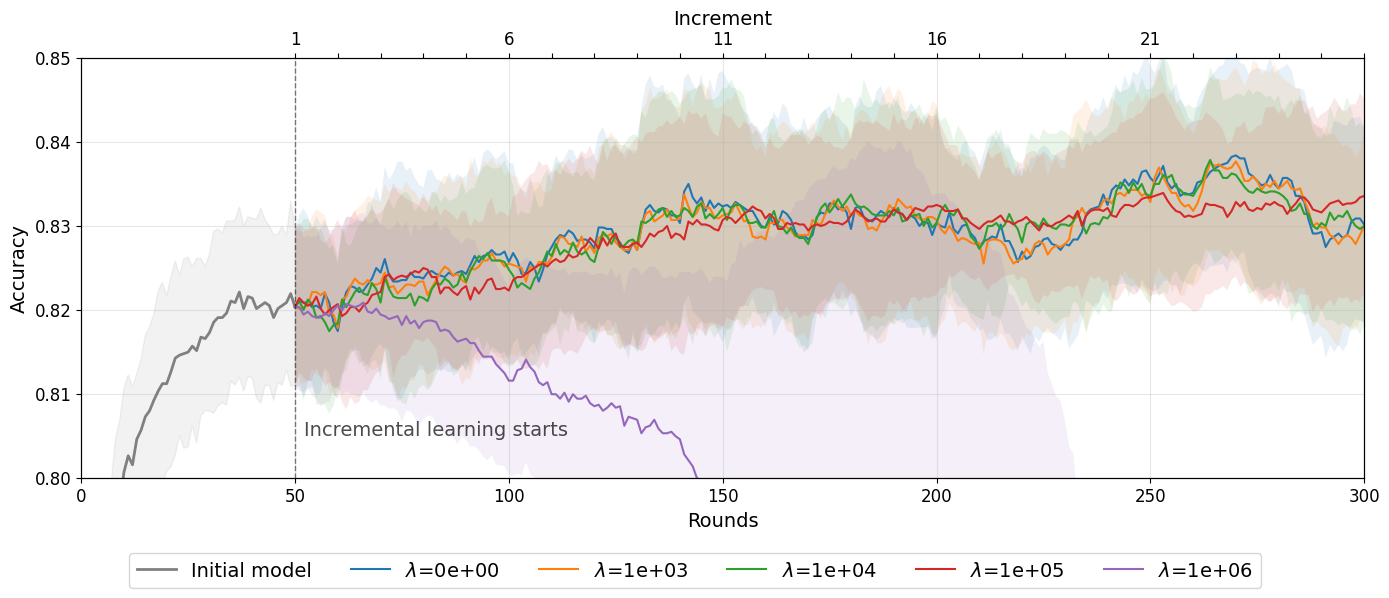

In [168]:
# SE3 - MLP EWC with consistent styling and initial model
fig, axes = plt.subplots(1, 1, figsize=(14, 6))

# Lists to store line objects for the combined legend
line_objects = []
line_labels = []

# First plot the initial model (first 50 rounds)
for i, res in enumerate(res_initial_mlp2c):
    # Only plot the first initial model
    if i > 0:
        continue
        
    hyperparams = res.hyperparameters()
    il_config = res.il_config()
    
    rounds, mean, std = res.get_mean_std("accuracy")
    
    # Limit to first 50 rounds
    limit = 51
    if len(rounds) > limit:
        rounds = rounds[:limit]
        mean = mean[:limit]
        std = std[:limit]
    
    # Plot initial model
    axes.fill_between(rounds, mean - std, mean + std, alpha=0.1, color='gray')
    line, = axes.plot(rounds, mean, color='gray', linestyle='-', linewidth=2, label="Initial model")
    
    line_objects.append(line)
    line_labels.append("Initial model")

def plot_ewc(res_list, ax, collect_legend=True):
    for i, res in enumerate(res_list):
        il_config = res.il_config()
        ewc = il_config["ewc"]
        
        rounds, mean, std = res.get_mean_std("accuracy")
        
        # Adjust rounds to start after initial model (offset by 50)
        adjusted_rounds = [r + 50 for r in rounds]

        ax.fill_between(adjusted_rounds, mean - std, mean + std, alpha=0.1)
        line, = ax.plot(adjusted_rounds, mean, label=f"$\lambda$={ewc:.0e}")
        
        if collect_legend:
            line_objects.append(line)
            line_labels.append(f"$\lambda$={ewc:.0e}")
            
        acc_final, std = res.get_final("accuracy")
        print(f"Final accuracy: {acc_final:.3f} ({std}) (clients={ewc})")
        
    ax.set_ylabel("Accuracy", fontsize=axis_font_size)
    ax.set_xlabel("Rounds", fontsize=axis_font_size)
    ax.set_ylim(0.8, 0.85)
    ax.set_xlim(0, 300)
    ax.grid(alpha=0.3)
    ax.tick_params(axis='both', labelsize=axis_font_size-2)
    
    # Add increment ticks on a secondary x-axis
    ax2 = ax.twiny()
    
    # Position increments to start after initial training (50 rounds)
    increment_position = [50 + i * 10 for i in range(26)]
    increment_labels = [f"{i+1}" if i % 5 == 0 else "" for i in range(26)]
    increment_labels[-1] = ""
    
    ax2.set_xticks(increment_position)
    ax2.set_xticklabels(increment_labels)
    ax2.set_xlabel("Increment", fontsize=axis_font_size)
    ax2.tick_params(axis='x', labelsize=axis_font_size-2)

    


# Use your existing result data
plot_ewc(res_ewc_inc, axes, collect_legend=True)

# Add vertical line to mark transition from initial to incremental
axes.axvline(x=50, color='black', linestyle='--', alpha=0.5, linewidth=1)
axes.text(52, 0.805, "Incremental learning starts", fontsize=14, alpha=0.7)


# Add a combined legend with improved styling
fig.legend(line_objects, line_labels, 
           loc='lower center', 
           bbox_to_anchor=(0.5, -0.05), 
           ncol=len(line_objects),
           fontsize=legend_font_size)

# Adjust layout
plt.tight_layout()
plt.subplots_adjust(bottom=0.15, top=0.85)  # Make space for legend, title and right-aligned titles

fig.savefig("graphs/exp2_ewc.svg", dpi=300, bbox_inches='tight')


In [186]:
for i, run in enumerate(zip(res_replay_mlp2c_v2, res_replay_mlp6c_v2, res_replay_xgb2c_v2, res_replay_xgb6c_v2)):
    run1, run2, run3, run4 = run
    mean, std = run1.get_final("accuracy")
    mean6, std6 = run2.get_final("accuracy")
    mean2, std2 = run3.get_final("accuracy")
    mean4, std4 = run4.get_final("accuracy")
    print(f"RP% {run1.il_config()['replay']}: MLP 2c: {mean:.4f} ± {std:.4f}, MLP 6c: {mean6:.4f} ± {std6:.4f}, XGB 2c: {mean2:.4f} ± {std2:.4f}, XGB 6c: {mean4:.4f} ± {std4:.4f}")

RP% 0.0: MLP 2c: 0.8310 ± 0.0130, MLP 6c: 0.8330 ± 0.0110, XGB 2c: 0.8290 ± 0.0090, XGB 6c: 0.8300 ± 0.0080
RP% 0.1: MLP 2c: 0.8360 ± 0.0110, MLP 6c: 0.8370 ± 0.0120, XGB 2c: 0.8360 ± 0.0070, XGB 6c: 0.8360 ± 0.0070
RP% 0.3: MLP 2c: 0.8330 ± 0.0120, MLP 6c: 0.8340 ± 0.0090, XGB 2c: 0.8420 ± 0.0060, XGB 6c: 0.8430 ± 0.0100
RP% 1.0: MLP 2c: 0.8280 ± 0.0120, MLP 6c: 0.8230 ± 0.0110, XGB 2c: 0.8410 ± 0.0110, XGB 6c: 0.8300 ± 0.0130


In [187]:
for run in res_ewc_inc:
    mean, std = run.get_final("accuracy")
    print(f"EWC λ={run.il_config()['ewc']:.0e}: {mean:.4f} ± {std:.4f}")

EWC λ=0e+00: 0.8300 ± 0.0120
EWC λ=1e+03: 0.8300 ± 0.0110
EWC λ=1e+04: 0.8300 ± 0.0120
EWC λ=1e+05: 0.8340 ± 0.0120
EWC λ=1e+06: 0.4620 ± 0.0830
